In [16]:
from keras import models , layers 
import tensorflow as tf
import os
import cv2
import numpy as np
import splitfolders
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score , classification_report ,confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score , precision_score
from keras.applications.vgg19 import VGG19
import seaborn as sns
import joblib

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4,activation = "softmax"))

In [3]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [5]:
def getData(path , image_dim = (180 , 180 ) ):
        x_train=[]
        for folder in os.listdir(path):
            sub_path=path+"/"+folder
            for img in os.listdir(sub_path):
                image_path=sub_path+"/"+img
                img_arr=cv2.imread(image_path)
                img_arr=cv2.resize(img_arr,image_dim)
                x_train.append(img_arr)
        train_x=np.array(x_train)
        train_x=train_x/255.0
        train_datagen = ImageDataGenerator(rescale = 1./255)
        training_set = train_datagen.flow_from_directory(path,
                                                         target_size = (180, 180),
                                                         batch_size = 3,
                                                         class_mode = 'categorical')
        train_y=training_set.classes
        training_set.class_indices
        
        return train_x , train_y 

In [5]:
X_train , y_train = getData("dataset2/train")

Found 5712 images belonging to 4 classes.


In [6]:
history = model.fit(X_train,y_train,epochs=50,batch_size=3)

Epoch 1/50
1904/1904 [==============================] - 230s 120ms/step - loss: 0.6119 - accuracy: 0.7616
Epoch 2/50
1904/1904 [==============================] - 223s 117ms/step - loss: 0.2620 - accuracy: 0.9028
Epoch 3/50
1904/1904 [==============================] - 229s 120ms/step - loss: 0.1269 - accuracy: 0.9555
Epoch 4/50
1904/1904 [==============================] - 238s 125ms/step - loss: 0.0661 - accuracy: 0.9786
Epoch 5/50
1904/1904 [==============================] - 222s 116ms/step - loss: 0.0442 - accuracy: 0.9867
Epoch 6/50
1904/1904 [==============================] - 220s 115ms/step - loss: 0.0356 - accuracy: 0.9886
Epoch 7/50
1904/1904 [==============================] - 215s 113ms/step - loss: 0.0411 - accuracy: 0.9890
Epoch 8/50
1904/1904 [==============================] - 221s 116ms/step - loss: 0.0271 - accuracy: 0.9930
Epoch 9/50
1904/1904 [==============================] - 214s 112ms/step - loss: 0.0379 - accuracy: 0.9898
Epoch 10/50
1904/1904 [=======================

# Evaluation model 

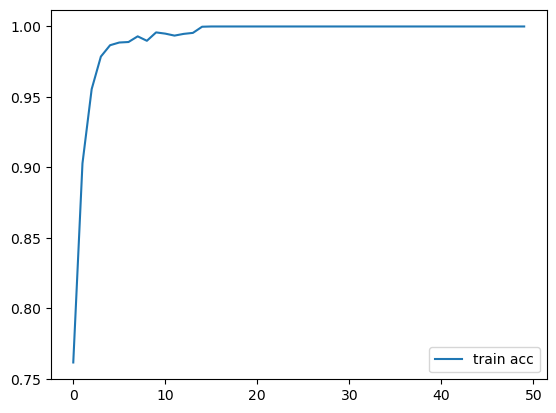

In [7]:
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()

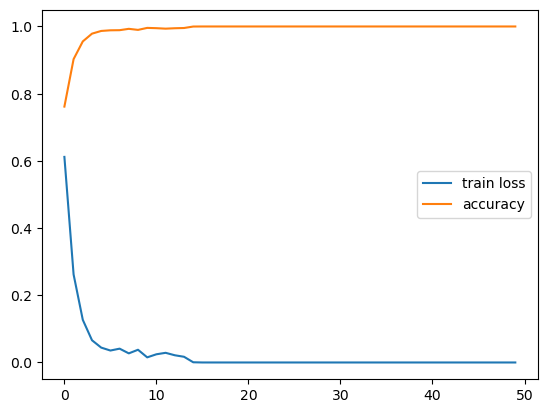

In [8]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()     

# save model 

In [9]:
joblib.dump(model , "CNN2.pkl" ,3 ) 

['CNN2.pkl']

In [17]:

def Test(test_path  ,path_model):
        model = joblib.load(path_model)
        
        X_test , y_test = getData(test_path)   
        ypred = model.predict(X_test)
        ypred=np.argmax(ypred,axis=1)
        rapport = classification_report(y_test,ypred)
        print('Rapport de Classification : \n',rapport)
        print("Accuracy: ", accuracy_score(y_test, ypred))
        print("Recall : ", recall_score(y_test, ypred, average='macro'))
        print("Precision: ", precision_score(y_test, ypred, average='macro'))
        print("F1 score: ", f1_score(y_test, ypred, average='macro'))

        cm = confusion_matrix(y_test,ypred)

        sns.heatmap(cm,
                annot=True,
                fmt='g',
                xticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'],
                yticklabels=['glioma', 'meningioma', 'notumor', 'pituitary'])
        plt.ylabel('Prediction',fontsize=13)
        plt.xlabel('Réelle',fontsize=13)
        plt.title('Matrice de confusion',fontsize=17)
        plt.show()

Found 1311 images belonging to 4 classes.
41/41 [==============================] - 10s 228ms/step
Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       300
           1       0.92      0.92      0.92       306
           2       0.98      1.00      0.99       405
           3       0.99      1.00      0.99       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311

Accuracy:  0.9595728451563692
Recall :  0.9566902687000726
Precision:  0.9577050619148311
F1 score:  0.9571240140246315


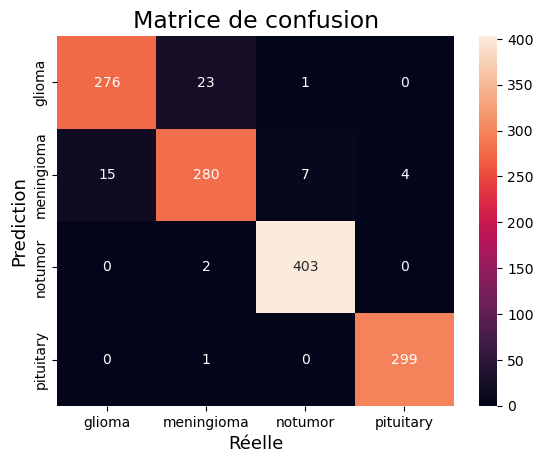

In [18]:
Test("dataset2/Test"  ,"CNN2.pkl")